$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
We are interested in harmonic oscillator matrix elements of the form 
$$
\begin{align}
    \bra{n'}\exp{i(\boldsymbol{k}}\cdot\boldsymbol{x})\ket{n}& \\
    &=\bra{n_x'}\exp(ik_x x)\ket{n_x}\bra{n_y'}\exp(ik_y y){n_y}\times\bra{n_z'}\exp(ik_z z)\ket{n_z}
\end{align}
$$
Next note the following operator method
$$e^{A+B}=e^Ae^Be^{-[A,B]/2}$$
when 
$$[A,[A,B]]=[B,[A,B]]=0$$
We have
$$\exp(ikx) =\exp[ikx_0(a^{\dagger}+a)]=\exp[-\frac{1}{2}(kx_0)^2]\exp(ikx_0a^{\dagger}) \exp(ikx_0 a)$$
Since 
$$
a^m\ket{n}=\Bigg\{
\begin{matrix}
[n!/(n-m)!]^{1/2}\ket{n-m} & m \leq {n}\\
0 & m>n
\end{matrix}
$$
Then we have
$$
\exp(ikx_0 a)\ket{n}=\sum^{\infty}_0 \frac{(ikx_0)^m}{m!}\left(\frac{n!}{(n-m)!}\right)^{1/2}\ket{n-m}
$$
Now operating to the right with $\exp(ikx_0 a)$ and to the left with $\exp(ikx_0 a^{\dagger})$, we obtain
$$
\bra{n'}\exp(ikx)\ket{n}=\exp[-\frac{1}{2}(kx_0)^2](n!n'!)^{1/2}(ikx_0)^{\Delta n}\sum^{n_<}_{m=0}
\frac{(-1)^m(kx_0)^{2m}}{m!(m+\Delta n)!(n_<-m)!}
$$
where $\Delta n=|n'-n|$ and $n_<$ is the lesser of the $n$ and $n'$. Only terms for which $n-m=n'-m'$ survive, thus $\Delta n = |m'-m|$. 
Noting the explicit form of the generalized Laguerre polynomial, 
$$
L^{\alpha}_m(X) = \sum^n_{m=0}=(-1)^m \begin{pmatrix}n+\alpha \\ n-m \end{pmatrix}\frac{X^m}{m!}
$$
Thus we arrive at the result
$$
\bra{n'}\exp(ikx)\ket{n}=\exp[-\frac{1}{2}(kx_0)^2][n_<!/(n_<+\Delta n)!]^{1/2}(ikx_0)^{\Delta n}L_{n_<}^{\Delta n}[(kx_0)^2]
$$

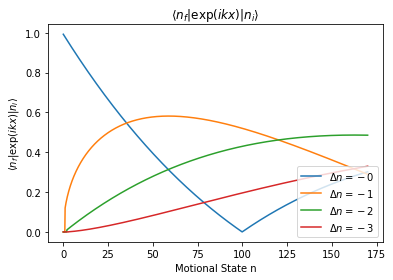

In [2]:
import numpy as np
from numpy.polynomial import Laguerre
from scipy.special import eval_genlaguerre
from scipy.special import factorial



eta = .12
n_arr = np.linspace(0, 170,1000)
import matplotlib.pyplot as plt
for del_n in range(0,4):
    y = np.abs(eval_genlaguerre(n_arr-del_n,del_n,eta**2)*(eta)**del_n*np.exp(-.5*eta**2)*(factorial(n_arr-del_n)/(factorial(n_arr)))**(1/2))
    plt.plot(n_arr , y, label=r'$\Delta n=-{} $'.format(del_n))

plt.title(r'$\langle n_f |\exp(ikx)|n_i \rangle $')
plt.xlabel("Motional State n")
plt.ylabel(r'$\langle n_f |\exp(ikx)|n_i \rangle $')
plt.legend(loc='lower right')
plt.show()

# Numerical Simulations of Two Level Atom in Thermal State Distribution
The goal of this notebook is to simulate the rabi flopping of a state that is occupying a number of motional levels ie is in a thermal state
The dynamics with the RWA are described by
\begin{align*}
    \frac{d^2c_g(t)}{dt^2}&=i\delta \frac{dc_g(t)}{dt}-\frac{\Omega^2}{4}c_g(t)  \\
     \frac{d^2c_e(t)}{dt^2}&=-i\delta \frac{dc_e(t)}{dt}-\frac{\Omega^2}{4}c_e(t) 
\end{align*}
The analytic solutions are 
\begin{align}
c_g(t) &= \left(\cos\frac{\Omega' t}{2}-i\frac{\delta}{\Omega'}\sin\frac{\Omega't}{2}\right)e^{i\delta t/2}  \\
c_e(t) &= -i\frac{\Omega}{\Omega'}\sin\frac{\Omega't}{2}e^{-i\delta t/2}\\
\Omega' &= \sqrt{\Omega^2 + \delta^2} 
\end{align}
The Rabifrequency of each n state is given by 
$$
\Omega_{n,n+s}=\Omega_0e^{-\eta^2/2}\eta^{|s|}\sqrt{\frac{n_<!}{n_>!}}L_{n_<}^{|s|}(\eta^2)
$$

Note also if we assume a thermal distribution (ie pretend the ion is coupled to a reservoir at temp T), we find a probability distribution of motional modes as
$$
T=\frac{\hbar \nu}{k_B ln\left(\frac{\bar{n}}{\bar{n}+1}\right)}
$$
$$
P_n=\frac{\bar{n}^n}{(\bar{n}+1)^{n+1})}
$$

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import statistics
%matplotlib inline

import time
t0=time.time()
##Variables
hbar = 1.0545e-34
k = 1.38e-23
ws=200e3*2*np.pi
W0=1*1e6  ##Rabi Frequency
eta=.11
d = 0  ##Detuning
nmax=1500 #needs to be 2000 for convergence
n_arr = np.linspace(0, nmax,nmax+1)
pn = np.zeros(len(n_arr))
del_n=0
y = np.abs(eval_genlaguerre(n_arr-del_n,del_n,eta**2)*(eta)**del_n*np.exp(-.5*eta**2))
wn=y*W0



#Initial Conditions 
del_t = (4*np.pi/W0)/10e3
t = np.arange(0,2*4*np.pi/W0,del_t)

##make thermal state prob distribution
nbar= 40

temp 0.0003888752640509976


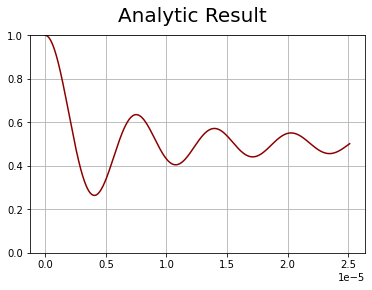

for loop time 0.4507944583892822
graph time 0.07569289207458496
total time 0.732783317565918
number of state 1500
nbar 40
mean 40.000000000000156


In [27]:
T = hbar*ws/(k*np.log((nbar+1)/nbar))
print('temp', T)
z=0
for n in n_arr:
    z += np.exp(-n*hbar*ws/(k*T))
                
for i in range(len(pn)):
    pn[i] = np.exp(-n_arr[i]*hbar*ws/(k*T))/z

mean=0
for x,y in zip(n_arr,pn):
    mean += x*y


t3=time.time()

##Analytic Solution

cgtot=np.zeros(len(t))
for i in range(nmax):
    Wp= math.sqrt(wn[i]**2+d**2)
    cgtot=cgtot+pn[i]*(np.cos(Wp*t/2))**2+(d/Wp)**2*(np.sin(Wp*t/2))**2
#     ce=((wn[i]/Wp)**2 * np.sin(Wp*t/2))**2


t4=time.time()
fig = plt.figure()
fig.suptitle('Analytic Result', fontsize=20)
ax = fig.gca()
ax.set_ylim(0,1.0)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(t,cgtot , color = 'darkred')
#     plt.plot(t,ce , color = 'darkblue')
#     plt.plot(t,cg , color = 'darkred',label="|g>, $\delta = 0$ ")
#     plt.plot(t,ce , color = 'darkblue',label="|e>, $\delta = 0$ ")
# plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()

t5=time.time()
print('for loop time', t4-t3)
print('graph time', t5-t4)
print('total time', t5-t0)
print('number of state' , nmax)
print('nbar', nbar)
print('mean',mean)

temp 0.28807518838216967


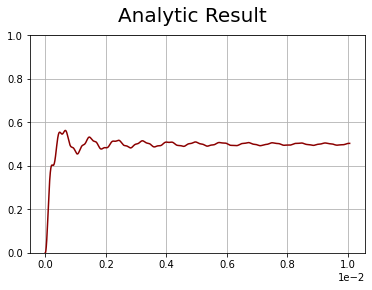

for loop time 6.846186399459839
graph time 0.10970354080200195
total time 51.613487005233765
number of state 1500
nbar 30000
mean 743.7420320530956


In [18]:
#with decoherence term

T = hbar*ws/(k*np.log((nbar+1)/nbar))
print('temp', T)
z=0
for n in n_arr:
    z += np.exp(-n*hbar*ws/(k*T))
                
for i in range(len(pn)):
    pn[i] = np.exp(-n_arr[i]*hbar*ws/(k*T))/z

mean=0
for x,y in zip(n_arr,pn):
    mean += x*y


t3=time.time()

##Analytic Solution
gam = 1e-9
cgtot=np.zeros(len(t))
for i in range(nmax):
    Wp= math.sqrt(wn[i]**2+d**2)
    cgtot=cgtot+pn[i]*.5*(1-np.exp(-gam*t)*np.cos(Wp*t))
#     ce=((wn[i]/Wp)**2 * np.sin(Wp*t/2))**2


t4=time.time()
fig = plt.figure()
fig.suptitle('Analytic Result', fontsize=20)
ax = fig.gca()
ax.set_ylim(0,1.0)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(t,cgtot , color = 'darkred')
#     plt.plot(t,ce , color = 'darkblue')
#     plt.plot(t,cg , color = 'darkred',label="|g>, $\delta = 0$ ")
#     plt.plot(t,ce , color = 'darkblue',label="|e>, $\delta = 0$ ")
# plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()

t5=time.time()
print('for loop time', t4-t3)
print('graph time', t5-t4)
print('total time', t5-t0)
print('number of state' , nmax)
print('nbar', nbar)
print('mean',mean)

In [220]:
T=360e-6
1/(1-np.exp(-hbar*ws/(k*T)))**3
print(6*k*T/(hbar*ws)/3)

74.98167446946763


We would now like to answer the question of why the decay does not always go to .5. We can do this by adding a decoherence term to the Hamiltonian.